# ¡Fill that cart!

# Description

Instacart is a grocery delivery platform where customers can register an order and have it delivered, similar to Uber Eats and Door Dash.

The data set provided has modifications from the original.

- The set size was reduced to make calculations faster and missing and duplicate values were introduced.
- The distributions of the original data were preserved when the changes were made.

# Step 1. Data description

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read data sets into DataFrames
df_instacart_orders = pd.read_csv('datasets/instacart_orders.csv',sep=';')
df_products = pd.read_csv('datasets/products.csv',sep=';')
df_aisles = pd.read_csv('datasets/aisles.csv',sep=';')
df_departments = pd.read_csv('datasets/departments.csv',sep=';')
df_order_products = pd.read_csv('datasets/order_products.csv',sep=';')

In [3]:
# show DataFrame information
print(df_instacart_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [4]:
# show DataFrame information
print(df_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [5]:
# show DataFrame information
print(df_aisles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [6]:
# show DataFrame information
print(df_departments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [7]:
# show DataFrame information
print(df_order_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


#Step 2. Data preprocessing
- Check and correct data types (for example, make sure ID columns are integers).
- Identify and complete missing values.
- Identifies and eliminates duplicate values.

## Find and remove duplicate values.

### `orders` data frame

In [8]:
# Check for duplicate orders
duplicates_order_products = df_order_products.duplicated().sum()
print(duplicates_order_products)

0


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Si, los valores de las columnas entre ellos

In [9]:
# Check all orders that were placed on Wednesday at 2:00 a.m.
pedidos_miercoles_2am = df_instacart_orders[(df_instacart_orders['order_dow'] == 3) & (df_instacart_orders['order_hour_of_day'] == 2)]

print(pedidos_miercoles_2am.shape[0])

121


In [10]:
# Eliminate duplicate orders
#Count duplicates = 15
#duplicates_instacart_orders= df_instacart_orders.duplicated().sum()
#print(duplicates_instacart_orders)
df_instacart_orders = df_instacart_orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Check again for duplicate rows
duplicates_instacart_orders= df_instacart_orders.duplicated().sum()
print(duplicates_instacart_orders)

0


In [12]:
# Recheck only for duplicate order IDs
duplicates_order_ids = df_instacart_orders['order_id'].duplicated().sum()
print(duplicates_order_ids)

0


### `products` data frame

In [13]:
# Check for completely duplicate rows
duplicates_df_products= df_products.duplicated().sum()
print(duplicates_df_products)

0


In [14]:
# Only checks for duplicate product IDs
duplicates_order_ids_df_products = df_products['product_id'].duplicated().sum()
print(duplicates_order_ids_df_products)

0


In [15]:
# Only check for duplicate product names (convert names to uppercase letters for better comparison)
duplicates_product_names = df_products['product_name'].str.upper().duplicated().sum()
print(duplicates_product_names)

1361


In [4]:
# Check for duplicate non-missing product names
duplicates_missing_product_names = df_products[~(df_products['product_name'].isna()) & (df_products['product_name'].str.lower().duplicated())]
print(duplicates_missing_product_names)

       product_id                                     product_name  aisle_id  \
2058         2059                                  Biotin 1000 Mcg        47   
5455         5456                 Green Tea With Ginseng and Honey        96   
5558         5559                           Cream Of Mushroom Soup        69   
7558         7559                        Cinnamon Rolls with Icing       105   
9037         9038                           American Cheese slices        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
2058            

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Pude utilizar mis habilidades de filtrado de datos para poder encontar alores duplicados y valores nulos dentro de los dataframes

### `departments` data frame

In [19]:
# Check for completely duplicate rows
duplicates_df_departments= df_departments.duplicated().sum()
print(duplicates_df_departments)

0


In [20]:
# Only check for duplicate product IDs
duplicates_id_departments = df_departments['department_id'].duplicated().sum()
print(duplicates_id_departments)

0


### `aisles` data frame

In [21]:
# Check for completely duplicate rows
duplicates_df_aisless= df_aisles.duplicated().sum()
print(duplicates_df_aisless)
print(df_aisles.columns)

0
Index(['aisle_id', 'aisle'], dtype='object')


In [22]:
# Only check for duplicate product IDs
duplicates_id_aisles = df_aisles['aisle_id'].duplicated().sum()
print(duplicates_id_aisles)

0


### `order_products` data frame

In [23]:
# Check for completely duplicate rows
duplicates_df_order_products= df_order_products.duplicated().sum()
print(duplicates_df_order_products)
print(df_order_products.columns)

0
Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')


In [24]:
# Check again for any other misleading duplicates
#duplicates_another_order_products = df_order_products['order_id'].duplicated().sum() =0
#duplicates_another_order_products = df_order_products['product_id'].duplicated().sum() =0
#duplicates_another_order_products = df_order_products['add_to_cart_order'].duplicated().sum() =0
duplicates_another_order_products = df_order_products['reordered'].duplicated().sum()
print(duplicates_another_order_products)


4545005


## Find and remove possible missing values

* The `'product_name'` column of the products table.
* The `'days_since_prior_order'` column of the orders table.
* The `'add_to_cart_order'` column of the order_products table.

### `products` data frame

In [25]:
# Find missing values in column 'product_name'
missing_values_product_name = df_products['product_name'].isnull().sum()
print(missing_values_product_name)

1258


Describe brevemente cuáles son tus hallazgos.

In [26]:
# Are all missing product names related to the aisle with ID 100?
print(df_products .columns)
missing_products_aisle_id_100 = df_products[df_products['product_name'].isnull() & (df_products['aisle_id'] == 100)]
print(missing_products_aisle_id_100)

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')
       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


In [27]:
# Are all missing product names related to the department with ID 21?
mis_val_rows_products = df_products[df_products['product_name'].isnull() & (df_products['department_id'] == 21)]
print(mis_val_rows_products)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


# The products in both aisle 100 and department 21 are void

In [28]:
# Use the department and aisle tables to review the data for the hallway with ID 100 and the department with ID 21.

aisle_data = df_aisles[df_aisles['aisle_id'] == 100]

department_data = df_departments[df_departments['department_id'] == 21]

display(aisle_data)
display(department_data)

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


In [29]:
# Complete missing product names with 'Unknown'

#1258
df_products['product_name'].fillna('Unknown', inplace=True)

### `orders` data frame

In [30]:
# Find missing values
unknown_values = df_products[df_products['product_name'] == 'Unknown']

print(unknown_values)

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


In [31]:
# Are there any missing values other than the customer's first order?
primer_pedido = df_products[['product_id', 'product_name', 'aisle_id', 'department_id']].isnull().any()

print(primer_pedido)

product_id       False
product_name     False
aisle_id         False
department_id    False
dtype: bool


### `order_products` data frame

In [32]:
# Find missing values
valores_ausentes = df_order_products.isnull().sum()
print(valores_ausentes)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [33]:
# What are the minimum and maximum values in this column?
valor_minimo = df_order_products['add_to_cart_order'].min()
valor_maximo = df_order_products['add_to_cart_order'].max()

print(valor_minimo)
print(valor_maximo)

1.0
64.0


# Findings.

Based on the products dataframe, we can only see that the add_to_cart_order column has missing values and with the help of the max and min methods we can know that the highest and smallest values are 1 and 64

maximum value

In [34]:
# Save all order IDs that have a missing value in 'add_to_cart_order'
df_pedidos_ausentes = df_order_products[df_order_products['add_to_cart_order'].isnull()]

IDs_pedidos = df_pedidos_ausentes['order_id'].unique()
print(IDs_pedidos)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [5]:
# Do all orders with missing values have more than 64 products?
# Groups all orders with missing data by their order ID.
# Count the number of 'product_id' in each order and check the minimum count value.

pedidos_ausentes = df_order_products[df_order_products['add_to_cart_order'].isnull()]

IDs_pedidos_ausentes = pedidos_ausentes['order_id']

productos_por_pedido = df_order_products[df_order_products['order_id'].isin(IDs_pedidos_ausentes)].groupby('order_id')['product_id'].count()

todos_con_mas_de_64_productos = productos_por_pedido.min() > 64

print("They all have more than 64 products", todos_con_mas_de_64_productos)


¿Todos los pedidos con valores ausentes tienen más de 64 productos?: True


# Note

I could see if within the orders of the product dataframe in terms of null values they have more than 64

In [36]:
# Replace missing values in column 'add_to_cart? with 999 and converts the column to integer type.
df_order_products['add_to_cart_order'].fillna(999, inplace=True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)
valores_ausentes = df_order_products.isnull().sum()
print(valores_ausentes)

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


# Summary

I was able to filter the missing data from add_to_cart_order and manipulate it to see if all the records in that column are greater than 64 and replace the name and data type for the products

## Conclusions

Write here your intermediate conclusions about Step 2. Data preprocessing
It was an excellent review of data manipulation, its structure and syntax.

# Step 3. Data analysis

Once the data is processed and ready


# [A]

1. Verify that the values in the `'order_hour_of_day'` and `'order_dow'` columns in the orders table are reasonable (i.e., `'order_hour_of_day'` ranges between 0 and 23 and `'order_dow'` ranges between 0 and 6).
2. Create a graph that shows the number of people placing orders depending on the time of day.
3. Create a graph that shows what day of the week people shop.
4. Create a graph showing the time people wait to place their next order, and comment on the minimum and maximum values.

### [A1] Verify that the values are sensitive

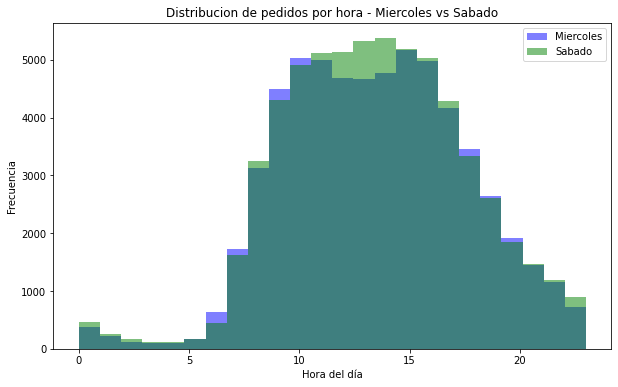

Horas únicas: [13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]
Días únicos: [6 5 0 4 3 1 2]


In [13]:
df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')


unique_hours = df_instacart_orders['order_hour_of_day'].unique()
unique_days = df_instacart_orders['order_dow'].unique()


wednesday_data = df_instacart_orders[df_instacart_orders['order_dow'] == 3]
saturday_data = df_instacart_orders[df_instacart_orders['order_dow'] == 6]

plt.figure(figsize=(10, 6))

#HISTOGRAMAS
plt.hist(wednesday_data['order_hour_of_day'], bins=24, alpha=0.5, label='Wednesday', color='blue')
plt.hist(saturday_data['order_hour_of_day'], bins=24, alpha=0.5, label='Saturday', color='green')

plt.xlabel('Time of the day')
plt.ylabel('Frequency')
plt.title('Distribution of orders per hour - Wednesday vs Saturday')
plt.legend()

plt.show()

print("unique hours:", unique_hours)
print("unique days:", unique_days)

# Conclusions

The values obtained for single hours and days are reasonable and follow the established conventions.

### [A2]For each hour of the day, how many people place orders?

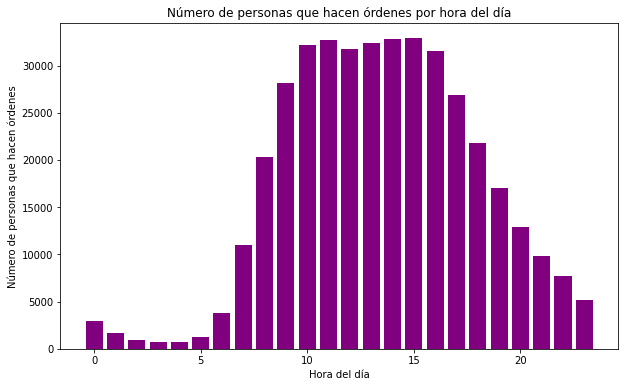

In [41]:
orders_per_hour = df_instacart_orders.groupby('order_hour_of_day')['user_id'].nunique()

plt.figure(figsize=(10, 6))
plt.bar(orders_per_hour.index, orders_per_hour, color='purple')

plt.xlabel('Time of day')
plt.ylabel('Number of people placing orders')
plt.title('Number of people placing orders by time of day')

plt.show()

### [A3] What day of the week do people buy groceries?

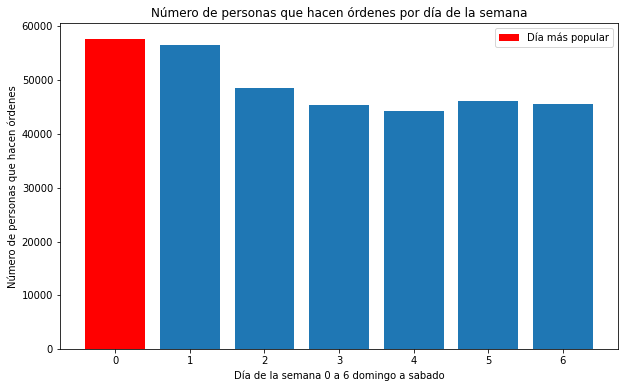

In [42]:
orders_per_day = df_instacart_orders.groupby('order_dow')['user_id'].nunique()

plt.figure(figsize=(10, 6))

orders_per_day = df_instacart_orders.groupby('order_dow')['user_id'].nunique()

plt.bar(orders_per_day.index, orders_per_day)

plt.xlabel('Day of the week 0 to 6 Sunday to Saturday')
plt.ylabel('Number of people placing orders')
plt.title('Number of people placing orders per day of the week')


max_day = orders_per_day.idxmax()

plt.bar(max_day, orders_per_day[max_day], color='red', label='Most popular day')


plt.legend()
plt.show()

### [A4] How long do people wait to place another order? Comment on the minimum and maximum values.

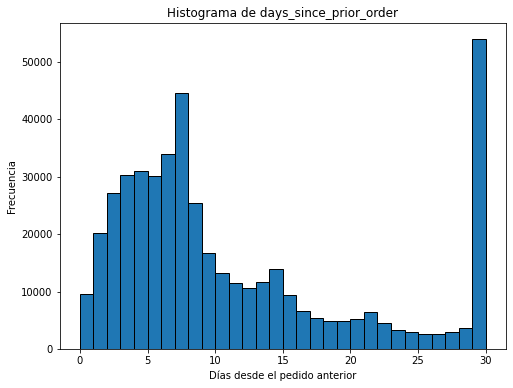

In [43]:
plt.figure(figsize=(8, 6))
plt.hist(df_instacart_orders['days_since_prior_order'], bins=30, edgecolor='black')
plt.title('Histogram of days_since_prior_order')
plt.xlabel('Days since previous order')
plt.ylabel('Frequency')
plt.show()

# Conclusions

They wait between 7 to 30 days to place a large order.

# [B]

1. Is there a difference between Wednesday and Saturday `'order_hour_of_day'` distributions? Plot bar graphs of `'order_hour_of_day'` for both days in the same figure
2. Plot the distribution for the number of orders that customers place (i.e., how many customers made only 1 order, how many made 2, how many made 3, and so on...).
3. What are the top 20 most frequently ordered products (show your ID and name)?

### [B1] Difference between Wednesday and Saturday for 'order_hour_of_day'. Plot bar graphs for the two days and describe any differences you see.

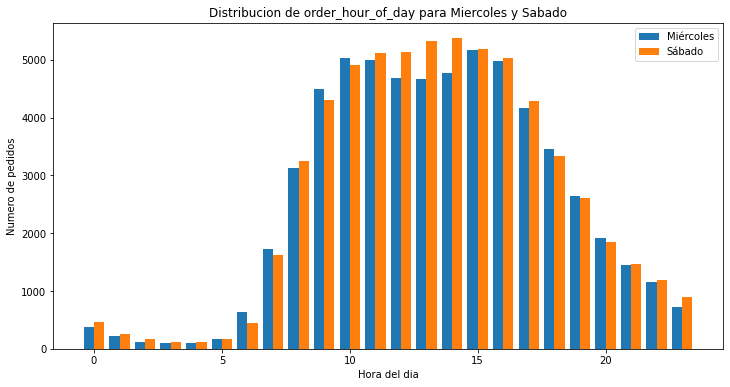

In [44]:
# 1
wednesday_orders = df_instacart_orders[df_instacart_orders['order_dow'] == 3]  # 3  miércoles
saturday_orders = df_instacart_orders[df_instacart_orders['order_dow'] == 6]  # 6  sábado

wednesday_distribution = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_distribution = saturday_orders['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(wednesday_distribution.index - 0.2, wednesday_distribution, width=0.4, label='Miércoles')
plt.bar(saturday_distribution.index + 0.2, saturday_distribution, width=0.4, label='Sábado')
plt.title('Distribution of order_hour_of_day for Wednesday and Saturday')
plt.xlabel('Time of day')
plt.ylabel('Number of orders')
plt.legend()
plt.show()


# Conclusions
There is a small difference between the orders placed on Wednesday and Saturday, but it is still possible to understand that the days where the number of orders increases is Saturday.

### [B2] What is the distribution for the number of orders per customer?

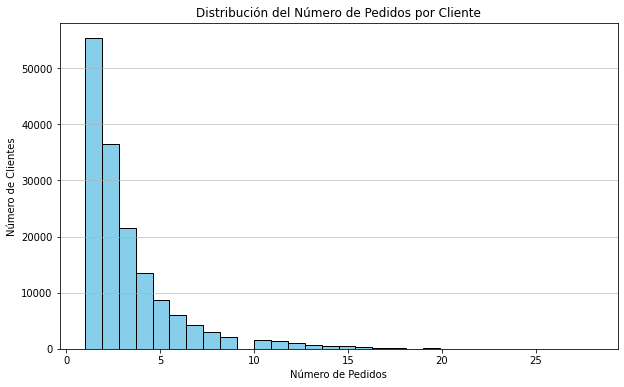

In [45]:
#2
orders_per_user = df_instacart_orders['user_id'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(orders_per_user, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of the Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)

plt.show()

In [46]:
print(df_instacart_orders.columns)
#df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv',sep=';')

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')


# Conclusions
Based on what is shown in the graph:
A distribution that could reflect this behavior is a decreasing exponential distribution.

### [B3] What are the 20 most popular products?

In [47]:
'''
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_merged = pd.merge(df_order_products, df_products, on='product_id')


product_popularity = df_merged['product_id'].value_counts().reset_index()
product_popularity.columns = ['product_id', 'order_count']

final_result = pd.merge(product_popularity, df_products, on='product_id')
top_20_products = final_result.head(20)[['product_id', 'product_name']]

print(top_20_products)
'''

    product_id              product_name
0        24852                    Banana
1        13176    Bag of Organic Bananas
2        21137      Organic Strawberries
3        21903      Organic Baby Spinach
4        47209      Organic Hass Avocado
5        47766           Organic Avocado
6        47626               Large Lemon
7        16797              Strawberries
8        26209                     Limes
9        27845        Organic Whole Milk
10       27966       Organic Raspberries
11       22935      Organic Yellow Onion
12       24964            Organic Garlic
13       45007          Organic Zucchini
14       39275       Organic Blueberries
15       49683            Cucumber Kirby
16       28204        Organic Fuji Apple
17        5876             Organic Lemon
18        8277  Apple Honeycrisp Organic
19       40706    Organic Grape Tomatoes


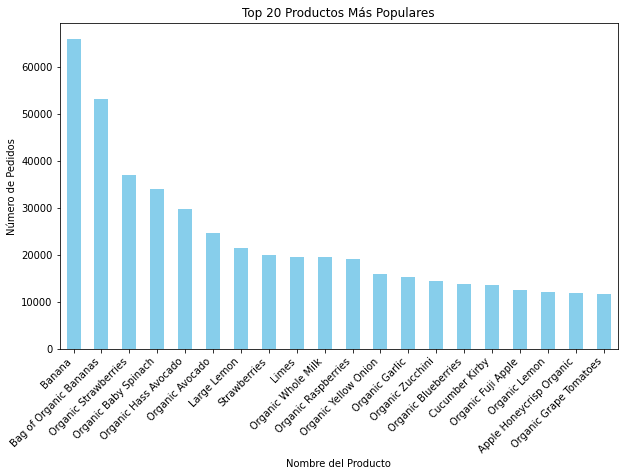

In [48]:
df_merged = pd.merge(df_order_products, df_products, on='product_id', how='inner')

top_products = df_merged['product_name'].value_counts().head(20)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Popular Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.show()


# Conclusions
Based on what is shown in the graph we can see the products that are ordered the most and that the product that is most ordered is the banana.

# [C]

1. How many items do people usually buy in one order? What is the distribution like?
2. What are the top 20 most frequently reordered items (show their names and product IDs)?
3. For each product, what is the repeat order rate (number of repeat orders/total orders?
4. For each customer, what proportion of the products she ordered had she already ordered? Calculate the repeat order rate for each user instead of each product.
5. What are the top 20 items that people put in their carts first (show the product IDs, their names, and the number of times they were the first item added to the cart)?

### [C1] How many items do people typically buy in one order? What is the distribution like?

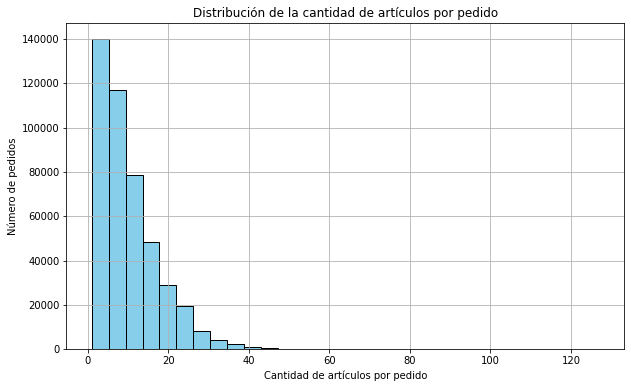

In [49]:
df_merged = pd.merge(df_order_products, df_products, on='product_id', how='inner')


plt.figure(figsize=(10, 6))
plt.hist(df_merged.groupby('order_id')['product_id'].count(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of the quantity of items per order')
plt.xlabel('Quantity of items per order')
plt.ylabel('Number of orders')
plt.grid(True)
plt.show()


# Conclusions
means that, on average, each order placed includes approximately 10 items per order

### [C2] What are the top 20 most frequently reordered items (show their names and product IDs)?

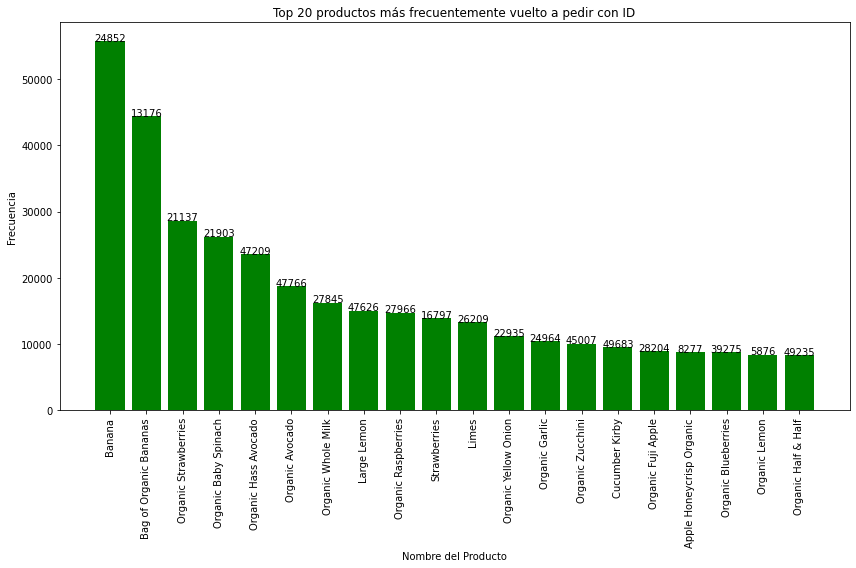

In [50]:
df_order_product_combined = pd.merge(df_order_products, df_products, on='product_id', how='inner')

reordered_products_count = df_order_product_combined[df_order_product_combined['reordered'] == 1]['product_name'].value_counts().head(20)

top_products_info = df_order_product_combined[df_order_product_combined['product_name'].isin(reordered_products_count.index)][['product_id', 'product_name']].drop_duplicates().set_index('product_name').to_dict()['product_id']

plt.figure(figsize=(12, 8))
plt.bar(reordered_products_count.index, reordered_products_count.values, color='green') 
plt.ylabel('Frequency')
plt.xlabel('Product Name')
plt.title('Top 20 most frequently reordered products with ID')

for index, value in enumerate(reordered_products_count.index):
    plt.text(index, reordered_products_count.values[index], f"{top_products_info[value]}", ha='center')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Conclusions

As with the most popular products, it is seen that most of these are related to being the first to be added to the cart from the beginning.

### [C3] For each product, what is the proportion of times it is ordered and reordered?

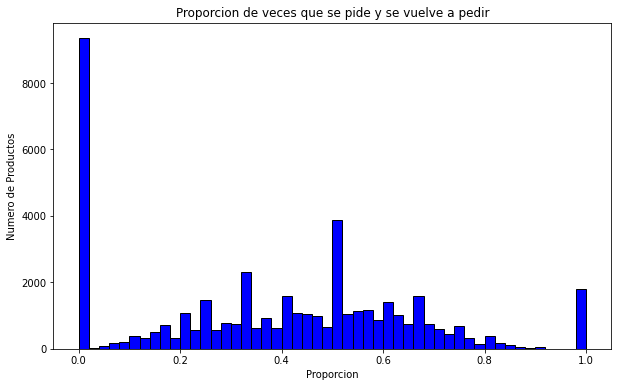

In [51]:
merged_df = pd.merge(df_order_products, df_products, on='product_id', how='inner')

product_count = merged_df.groupby('product_id')['reordered'].agg(['count', 'sum'])
product_count['reorder_ratio'] = product_count['sum'] / product_count['count']

result_df = pd.merge(df_products, product_count, left_on='product_id', right_index=True, how='inner')

plt.figure(figsize=(10, 6))
plt.hist(result_df['reorder_ratio'], bins=50, color='blue', edgecolor='black')
plt.title('Proportion of times requested and requested again')
plt.xlabel('Proportion')
plt.ylabel('Number of Products')

plt.show()


# Conclusions
The proportion shown is that there are not too many times in which some orders are made again, mainly banana is the one that is ordered the most by people

### [C4] For each customer, what proportion of your products had they already ordered?

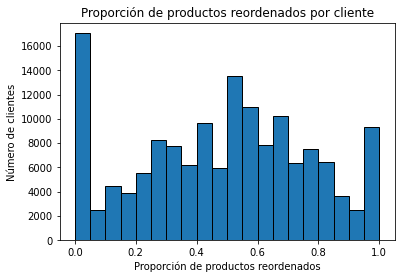

In [52]:
merged_df = pd.merge(df_order_products, df_instacart_orders, on='order_id')
merged_df = pd.merge(merged_df, df_products, on='product_id')

reorder_prop = merged_df.groupby(['user_id', 'product_id'])['reordered'].max().reset_index()
reorder_prop = reorder_prop.groupby('user_id')['reordered'].mean().reset_index()

plt.hist(reorder_prop['reordered'], bins=20, edgecolor='black')
plt.title('Proportion of products reordered per customer')
plt.xlabel('Proportion of reordered products')
plt.ylabel('Number of clients')

plt.show()

# Conclusions
Very few people reorder an order they have already requested.

### [C5] What are the top 20 items that people put in their carts first?

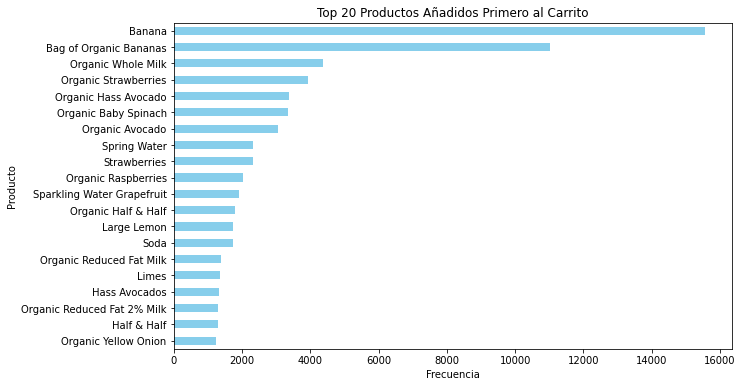

In [53]:
merged_df = pd.merge(df_order_products, df_products, on='product_id', how='inner')

first_in_cart = merged_df[merged_df['add_to_cart_order'] == 1]

top_20_first_in_cart = first_in_cart['product_name'].value_counts().head(20)


plt.figure(figsize=(10, 6))
top_20_first_in_cart.plot(kind='barh', color='skyblue')
plt.title('Top 20 Products Added First to Cart')
plt.xlabel('Frequency')
plt.ylabel('Product')
plt.gca().invert_yaxis()

plt.show()

# Conclusions
As with the most popular products, it is seen that most of these are related to being the first to be added to the cart from the beginning.

# General conclusion of the project:

I could see that the cart purchases, several of them, were almost null.
In order to discover that I had to read the dataframes not only in the rows of the dataframes but also in the columns to find the missing data and thus have more precise results.

The project was a great practice to test the ability to manipulate data and filter it and in this way compare results and generate hypotheses from them in order to generate a more visual response with the graphs.